---
## Step 0: Load The Data

##### First we download the data

In [2]:
import os
from urllib.request import urlretrieve

def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')

# Download the training and test dataset.
download('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip', 'data.zip')

print('All files downloaded.')

All files downloaded.


#### The training Data set has now been downloaded
- Now we unzip it 

In [3]:
import zipfile
import os
print ("Unzipping training data ....")
if not os.path.isdir('data'):
    zip_ref = zipfile.ZipFile('data.zip', 'r')
    zip_ref.extractall('data')
    zip_ref.close()
print ("Training extracted to folder data")

Unzipping training data ....
Training extracted to folder data


In [4]:
# Load pickled data
import pickle


training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
# Some variables to ensure some operations are run only once
is_augmented = False
is_normalized = False

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Class Distribution for training set


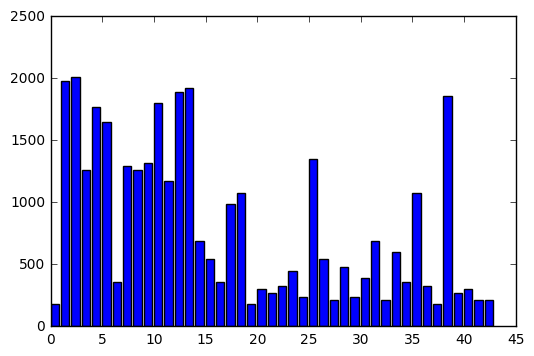

Class Distribution for test set


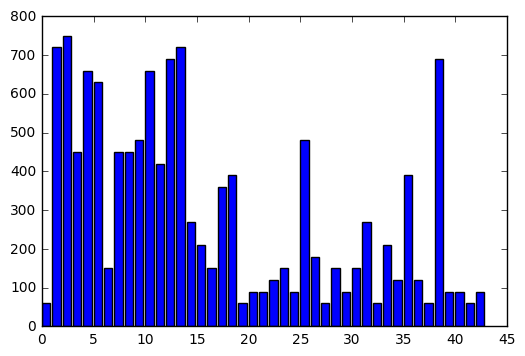

Class Distribution for validation set


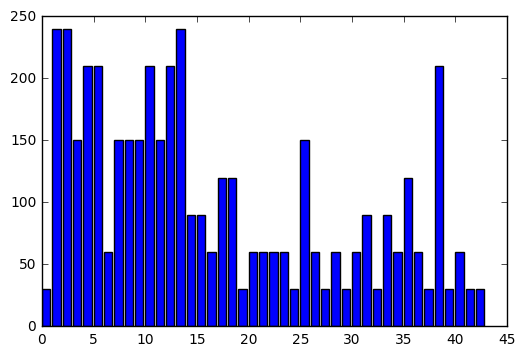

In [7]:
import numpy as np

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
num_train_labels = []
num_test_labels = []
num_valid_labels = []
for i in range(0,43):
    num_train_labels.append(np.sum(y_train == i))
    num_test_labels.append(np.sum(y_test == i))
    num_valid_labels.append(np.sum(y_validation == i))
print ("Class Distribution for training set")
plt.bar(range(0,43), num_train_labels)
plt.show()
print ("Class Distribution for test set")
plt.bar(range(0,43), num_test_labels)
plt.show()
print ("Class Distribution for validation set")
plt.bar(range(0,43), num_valid_labels)
plt.show()

Class Distribution for training set


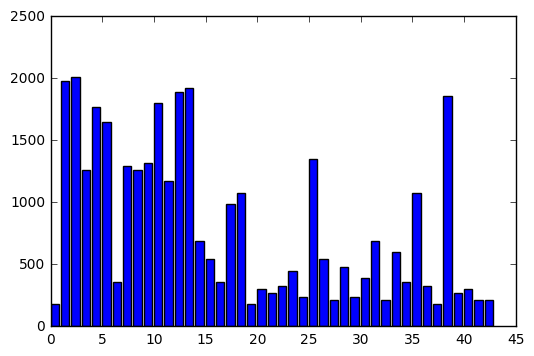

In [8]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
num_train_labels = []
for i in range(0,43):
    num_train_labels.append(np.sum(y_train == i))

print ("Class Distribution for training set")
plt.bar(range(0,43), num_train_labels)
plt.show()

In [12]:
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def normalize(img):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    Args: The image to be normalized
    return: Normalized image data
    """
    img = rgb2gray(img)
    normalized = (img)/255.0 - 0.5
    normalized = normalized.reshape((-1,32,32,1))
    return normalized.astype(np.float32)

# Ensure image data is normalized only once
if not is_normalized:
    X_train = normalize(X_train)
    X_validation = normalize(X_validation)
    X_test = normalize(X_test)
    is_normalized = True

print ("The new image shape is:",X_train[0].shape)

The new image shape is: (32, 32, 1)


In [13]:
# Shuffle the training set
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D

In [15]:
model = Sequential()
model.add(Conv2D(filters=6,
                 input_shape=(32,32,1),
                 kernel_size=(3,3),
                activation='relu'))
model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),
                   strides=(2,2)))
model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),
                   strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=240,
               activation='relu'))
model.add(Dense(units=120,
               activation='relu'))
model.add(Dense(units=43,
               activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
import keras
one_hot_y_train = keras.utils.to_categorical(y_train, 43)
one_hot_y_validation = keras.utils.to_categorical(y_validation, 43)
one_hot_y_test = keras.utils.to_categorical(y_test, 43)


In [19]:
model.fit(X_train, one_hot_y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_validation, one_hot_y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 24s - loss: 0.0972 - acc: 0.9759 - val_loss: 0.2616 - val_acc: 0.9338
Epoch 2/10
17920/34799 [==============>...............] - ETA: 12s - loss: 0.0665 - acc: 0.9831

KeyboardInterrupt: 